In [1]:
# for data processing and manipulation
import pandas as pd
import numpy as np


# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

#misc
from datetime import datetime
import xlrd

In [2]:
greenhouse = pd.read_parquet('../data/GreenhouseClimate.parquet')
weather = pd.read_parquet('../data/Weather.parquet')

In [3]:
# Print datatypes
print(weather.dtypes)

# Describe columns
weather.describe(include='all')

%time        float64
AbsHumOut    float64
Iglob        float64
PARout       float64
Pyrgeo       float64
RadSum       float64
Rain         float64
Rhout        float64
Tout         float64
Winddir      float64
Windsp       float64
dtype: object


,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
count,47809.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000
mean,43898.000000,6.569647,125.296703,250.270026,-52.871381,477.410229,0.052579,74.847942,9.025341,28.636369,4.982486
std,47.921576,1.733592,222.006296,443.856662,36.340826,724.258902,0.223193,19.873991,4.229593,26.860777,3.849020
min,43815.000000,0.879099,0.000000,0.000000,-136.000000,0.000000,0.000000,10.100003,-0.200000,1.000000,0.000000
25%,43856.500000,5.446391,0.000000,0.000000,-84.000000,0.000000,0.000000,61.700000,6.300000,4.000000,2.200000
50%,43898.000000,6.568635,0.000000,1.000000,-54.000000,122.000000,0.000000,79.300000,8.400000,32.000000,4.200000
75%,43939.500000,7.701009,146.000002,287.000000,-17.000000,613.000000,0.000000,91.275000,11.000000,32.000004,7.100000
max,43981.000000,12.427134,1505.000000,2010.000000,0.000000,2999.000000,1.000000,99.700000,27.300000,128.000000,21.900000


In [4]:
# Preview the dataset
weather.head(-1)

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...
47803,43980.98264,9.395935,0.0,6.710000e-08,-84.0,2992.0,0.0,71.8,15.2,2.0,4.3
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3
47806,43980.99306,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,3.8


In [5]:
# Check if there are null values in any of the columns. You will see `Unnamed: 32` has a lot.
weather.isna().sum()

%time         0
AbsHumOut    71
Iglob        71
PARout       71
Pyrgeo       71
RadSum       71
Rain         71
Rhout        71
Tout         71
Winddir      71
Windsp       71
dtype: int64

In [6]:
df = pd.concat([weather,greenhouse['AssimLight']], axis = 1)


In [7]:
df.dropna(inplace=True)
df["AssimLight"] = pd.to_numeric(df["AssimLight"])

In [8]:
df.head(-1)

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp,AssimLight
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7,0
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7,0
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7,0
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7,0
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47802,43980.97917,9.414688,0.0,0.000000e+00,-84.0,2992.0,0.0,71.5,15.3,2.0,4.3,0
47803,43980.98264,9.395935,0.0,6.710000e-08,-84.0,2992.0,0.0,71.8,15.2,2.0,4.3,0
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3,0
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3,0


In [9]:
times = df['%time'].values
new_times = [xlrd.xldate_as_datetime(time, 0 ) for time in times]

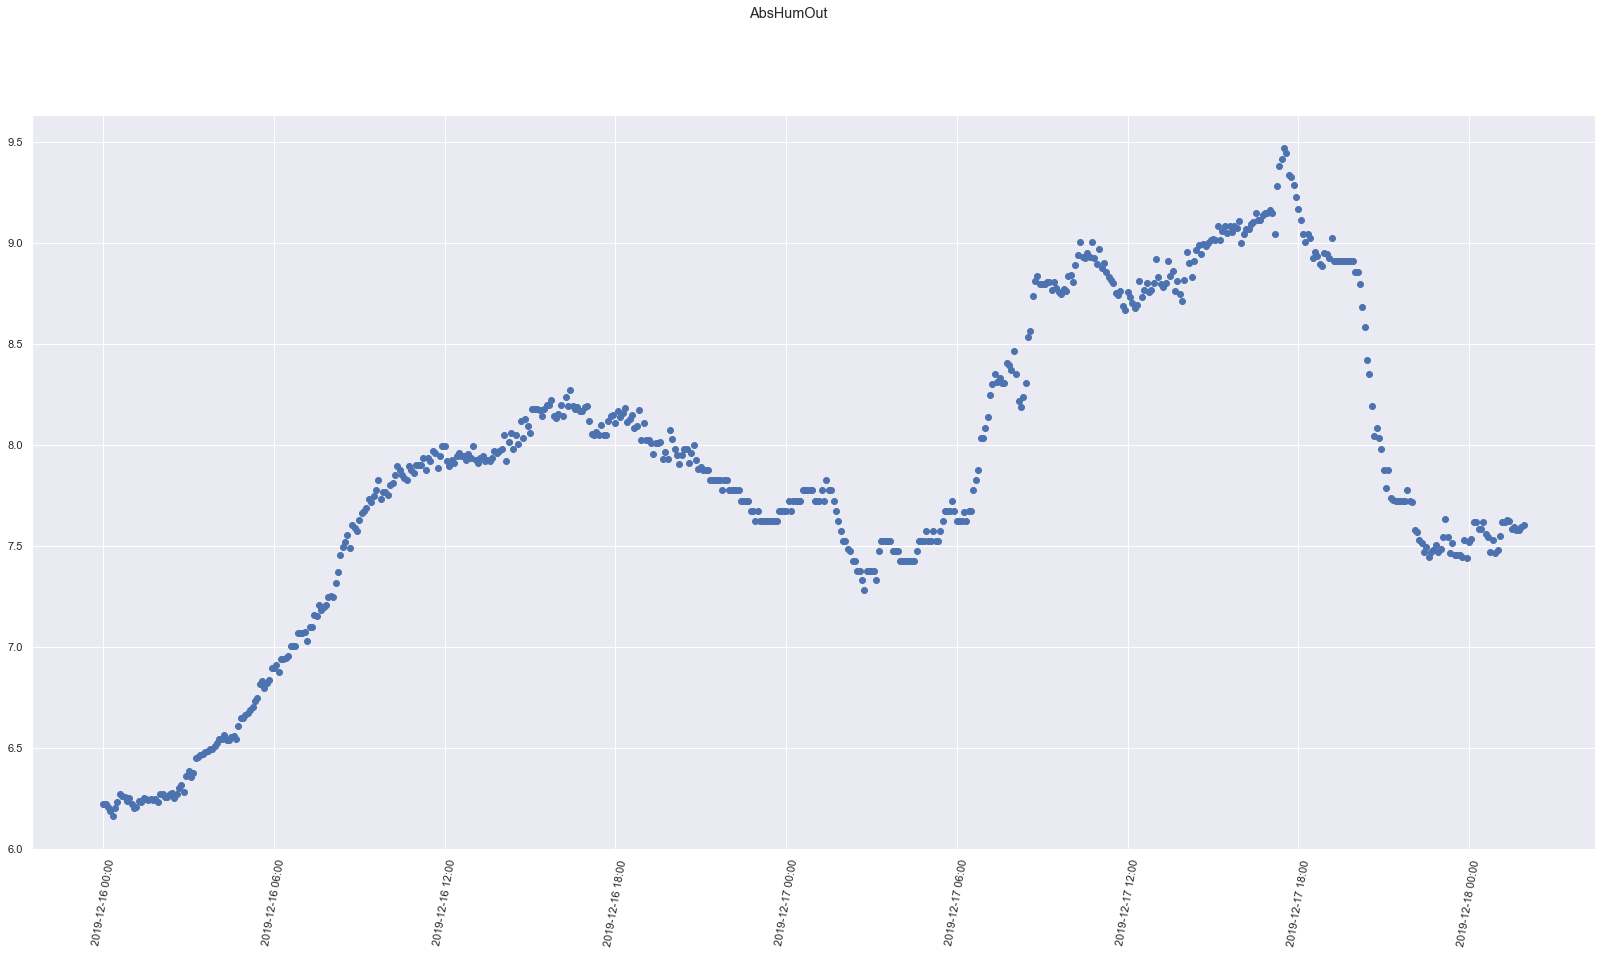

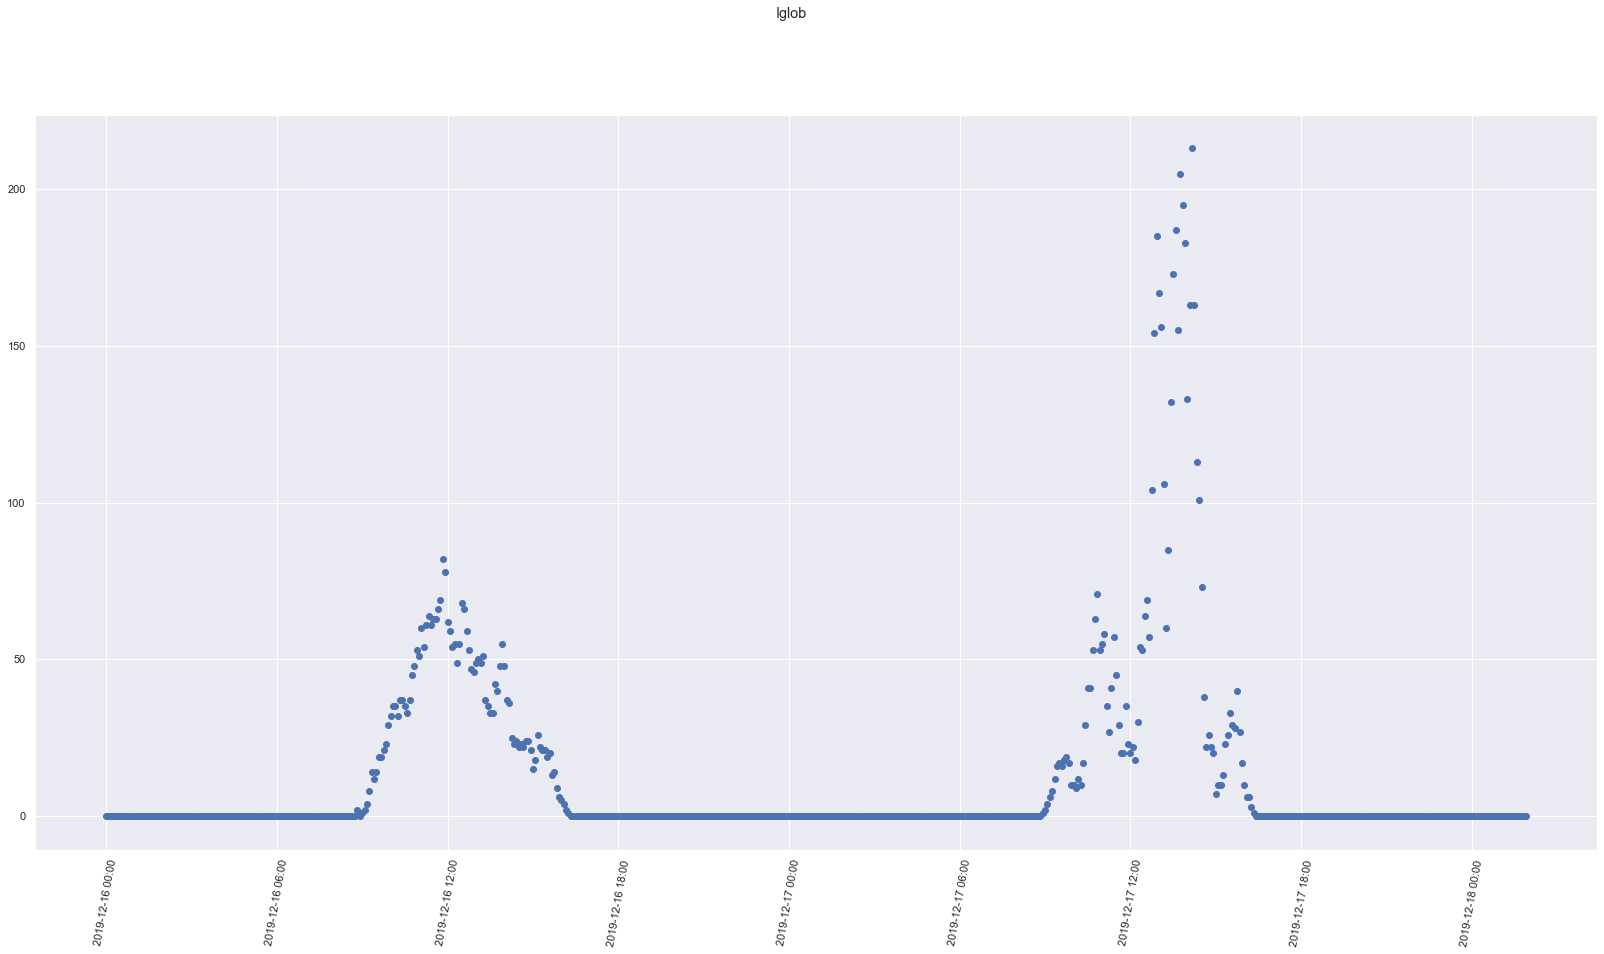

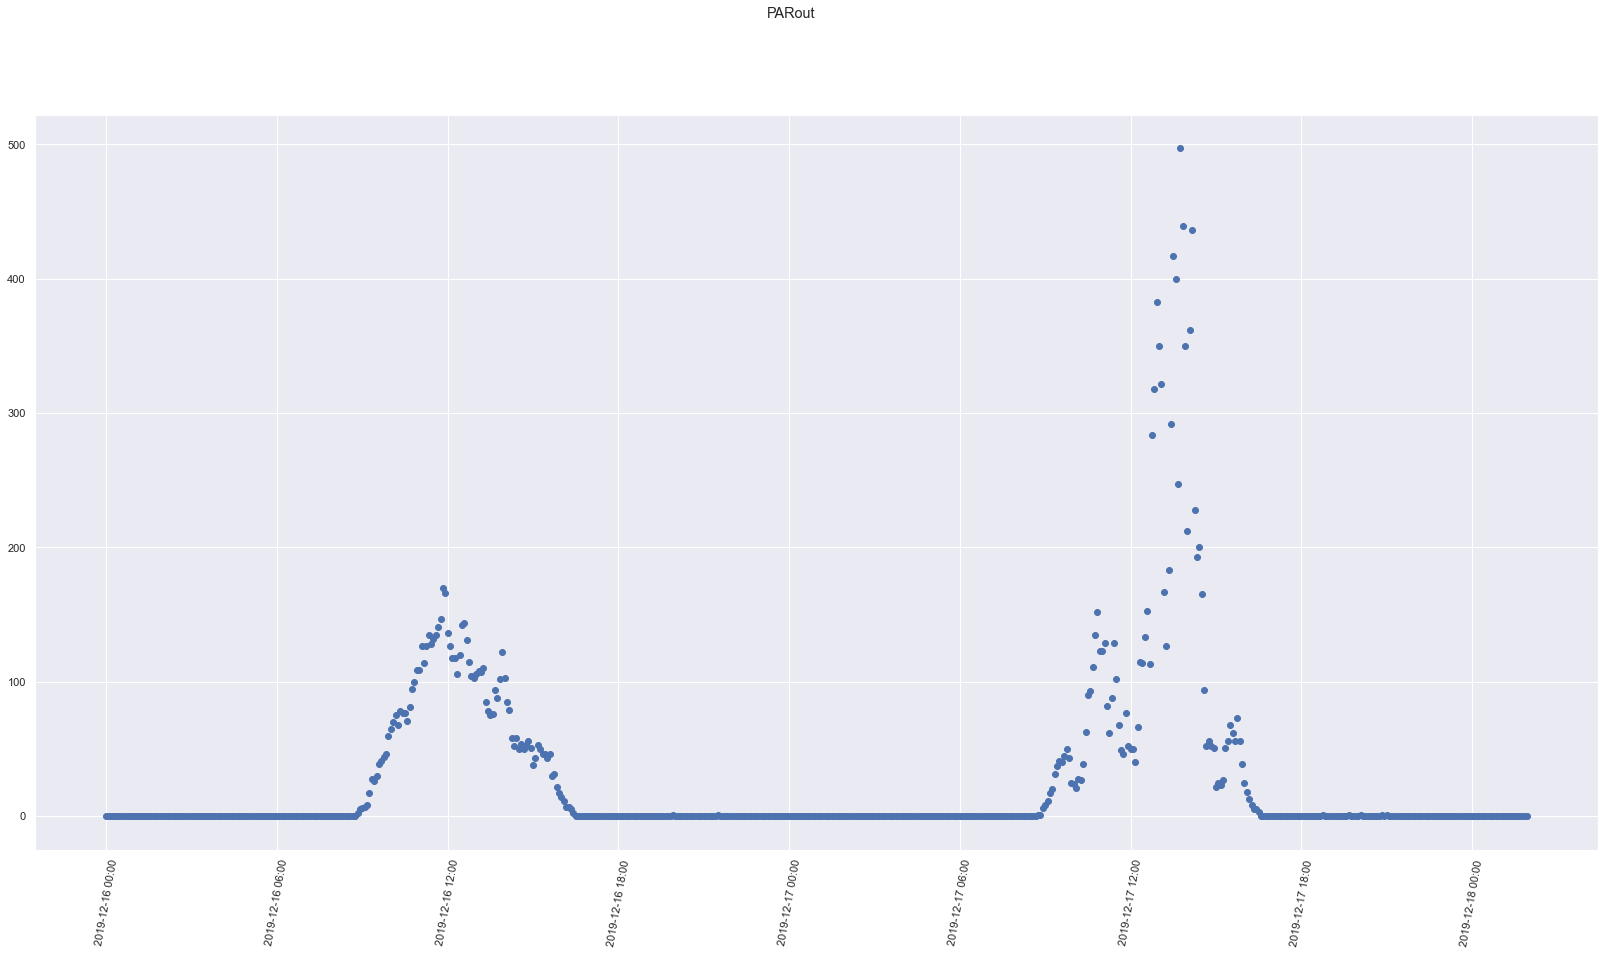

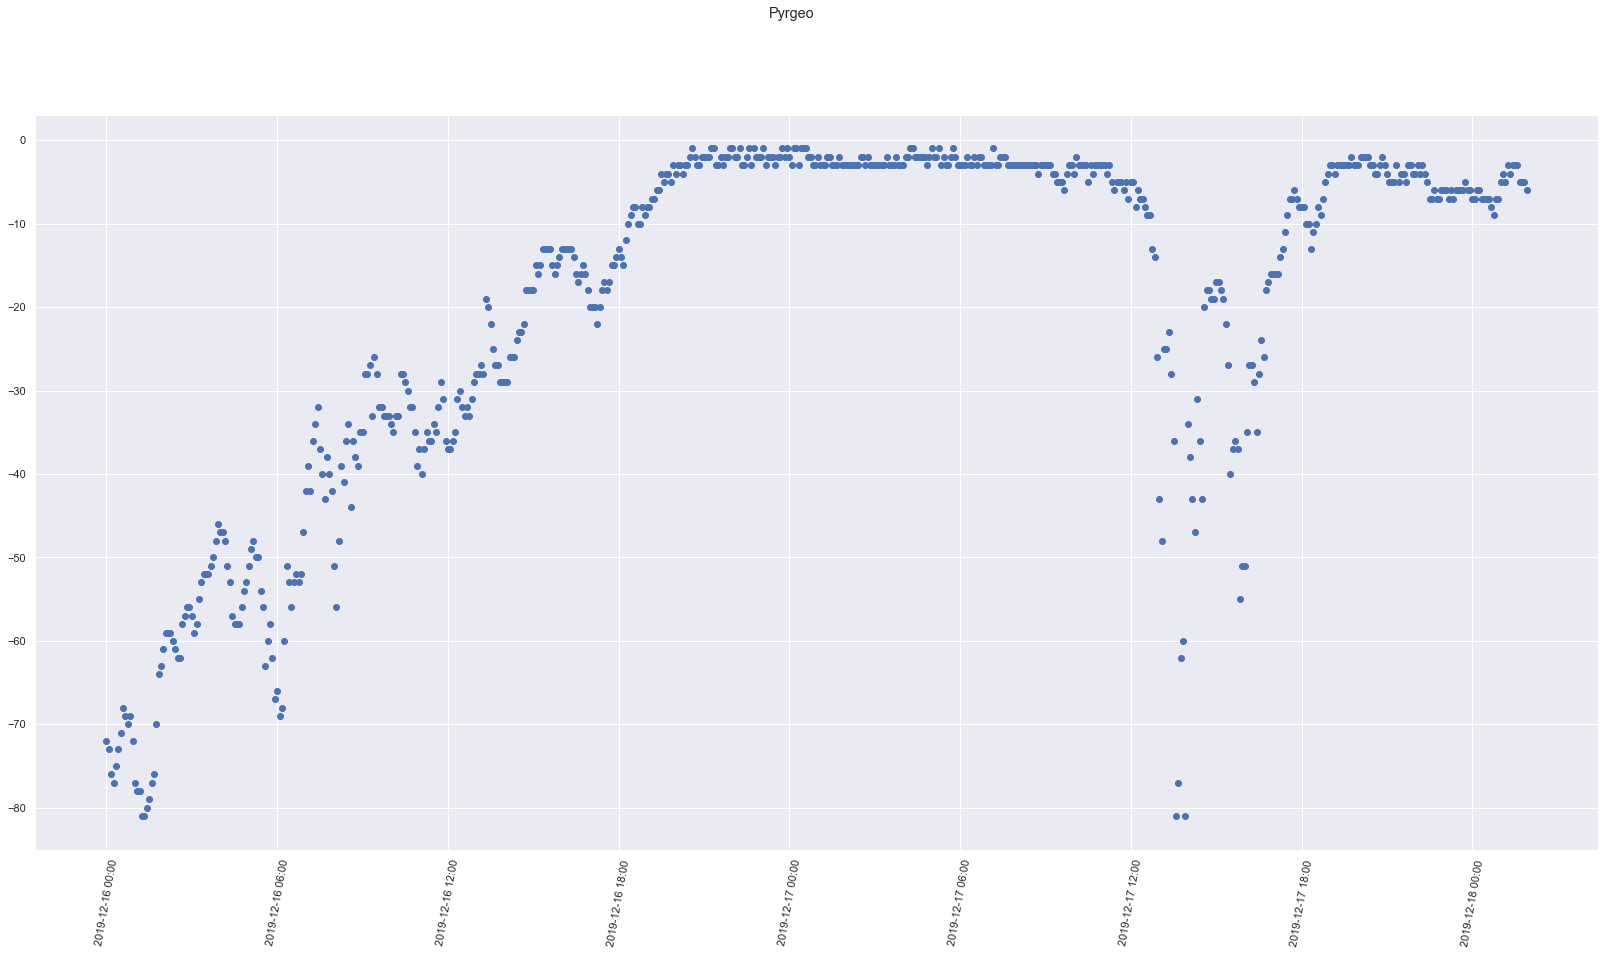

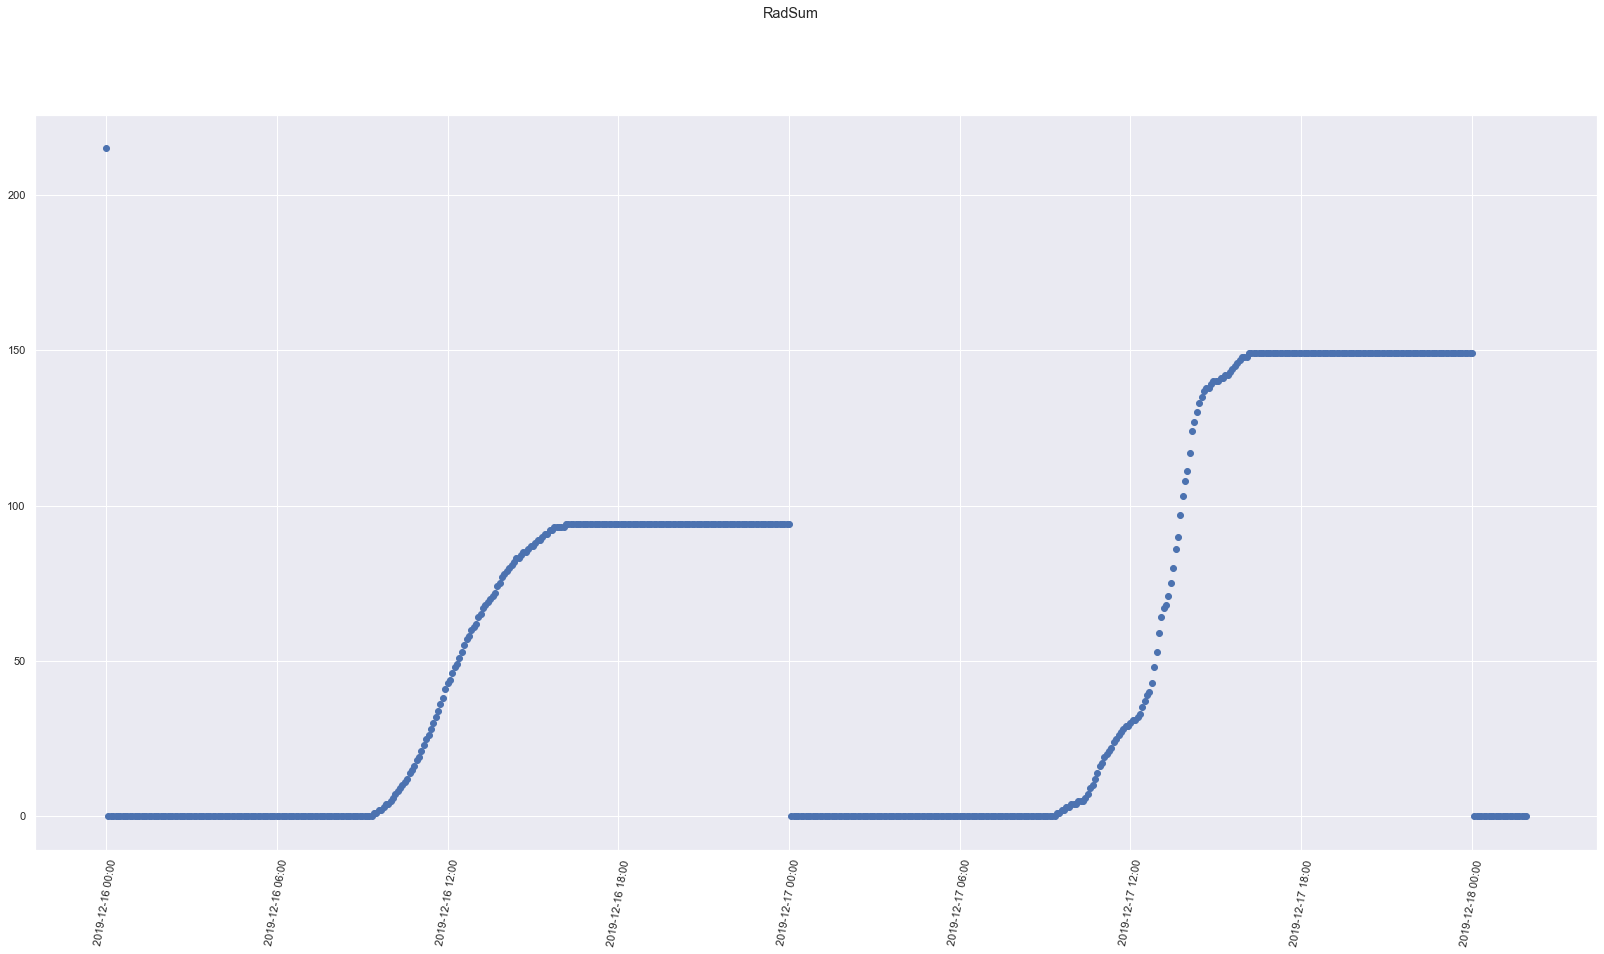

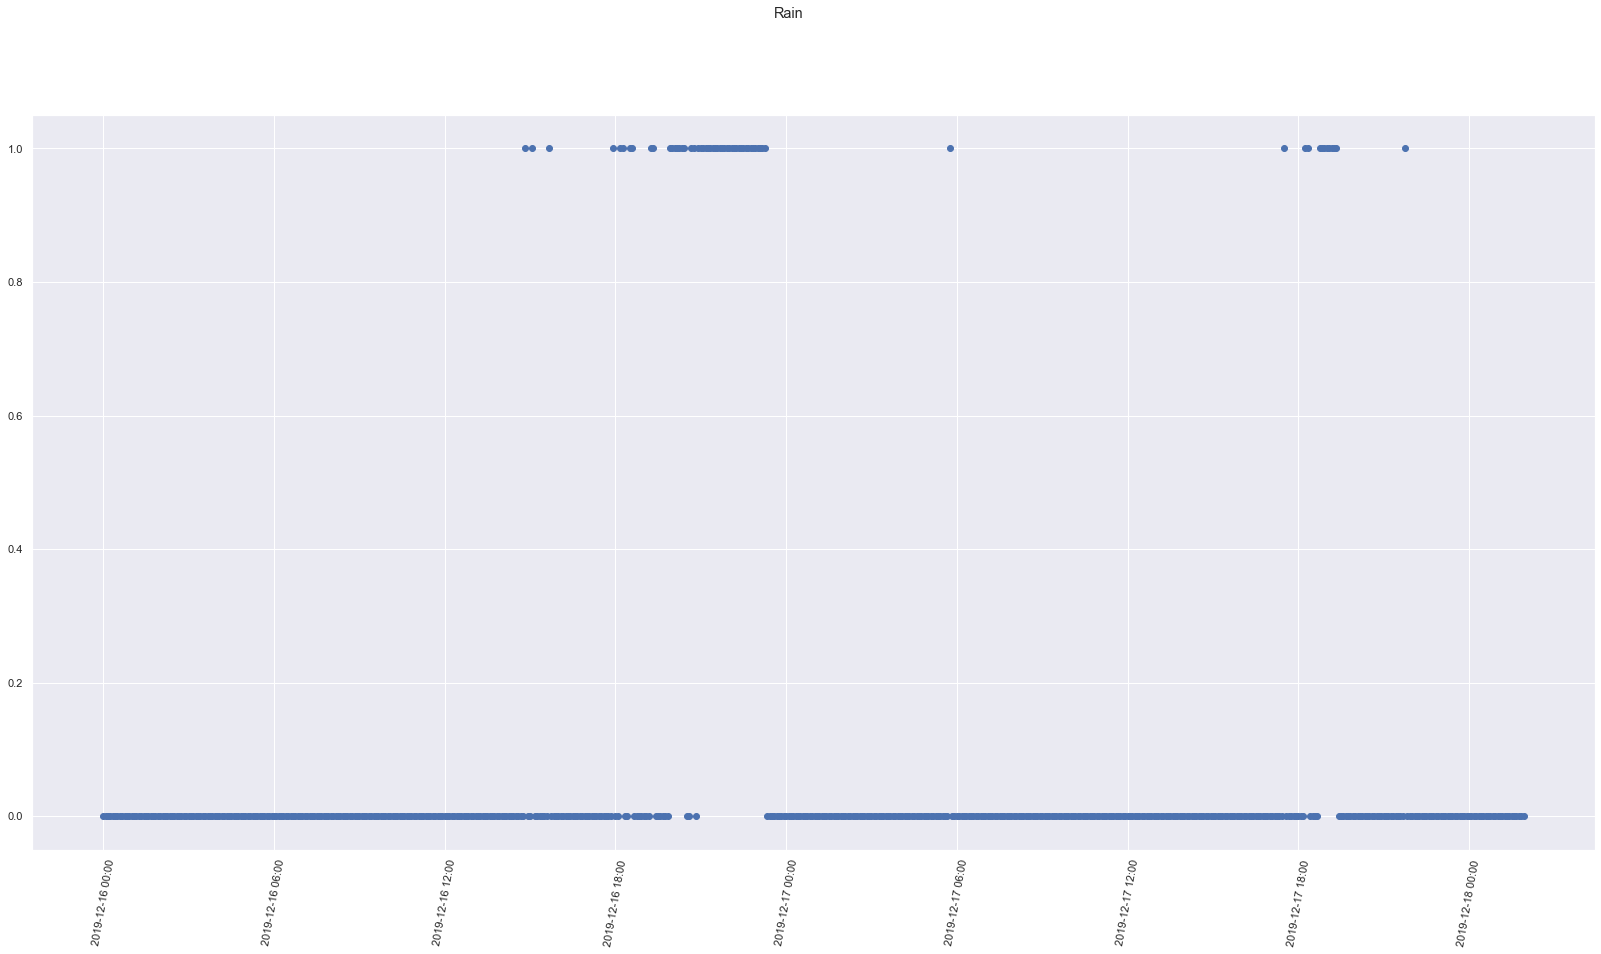

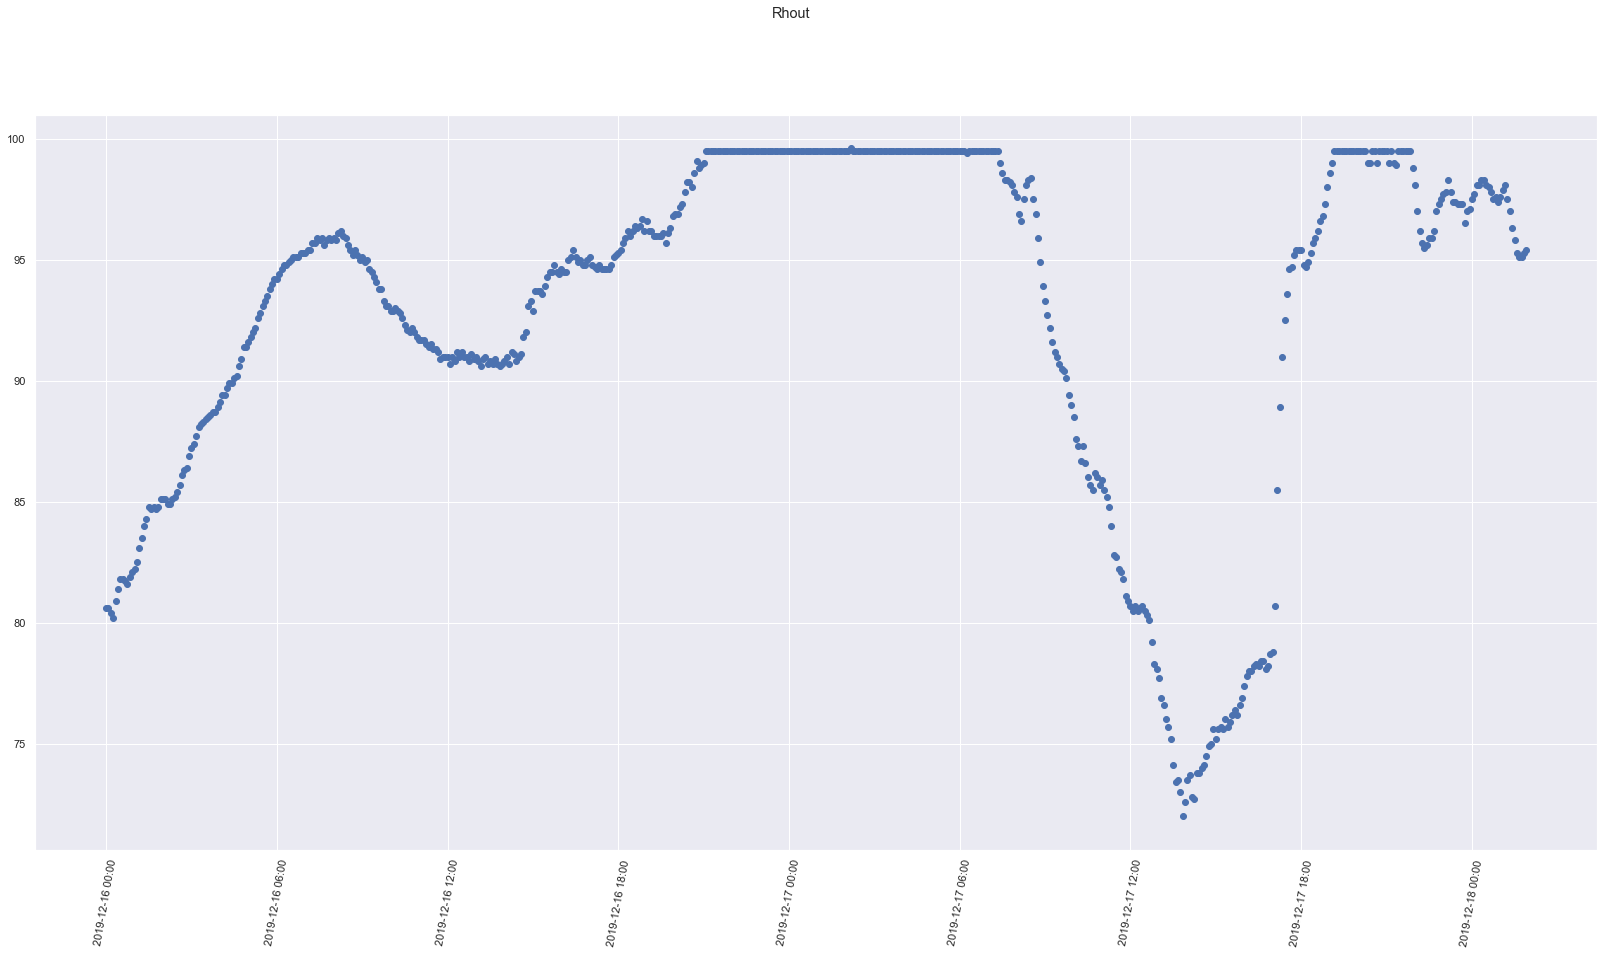

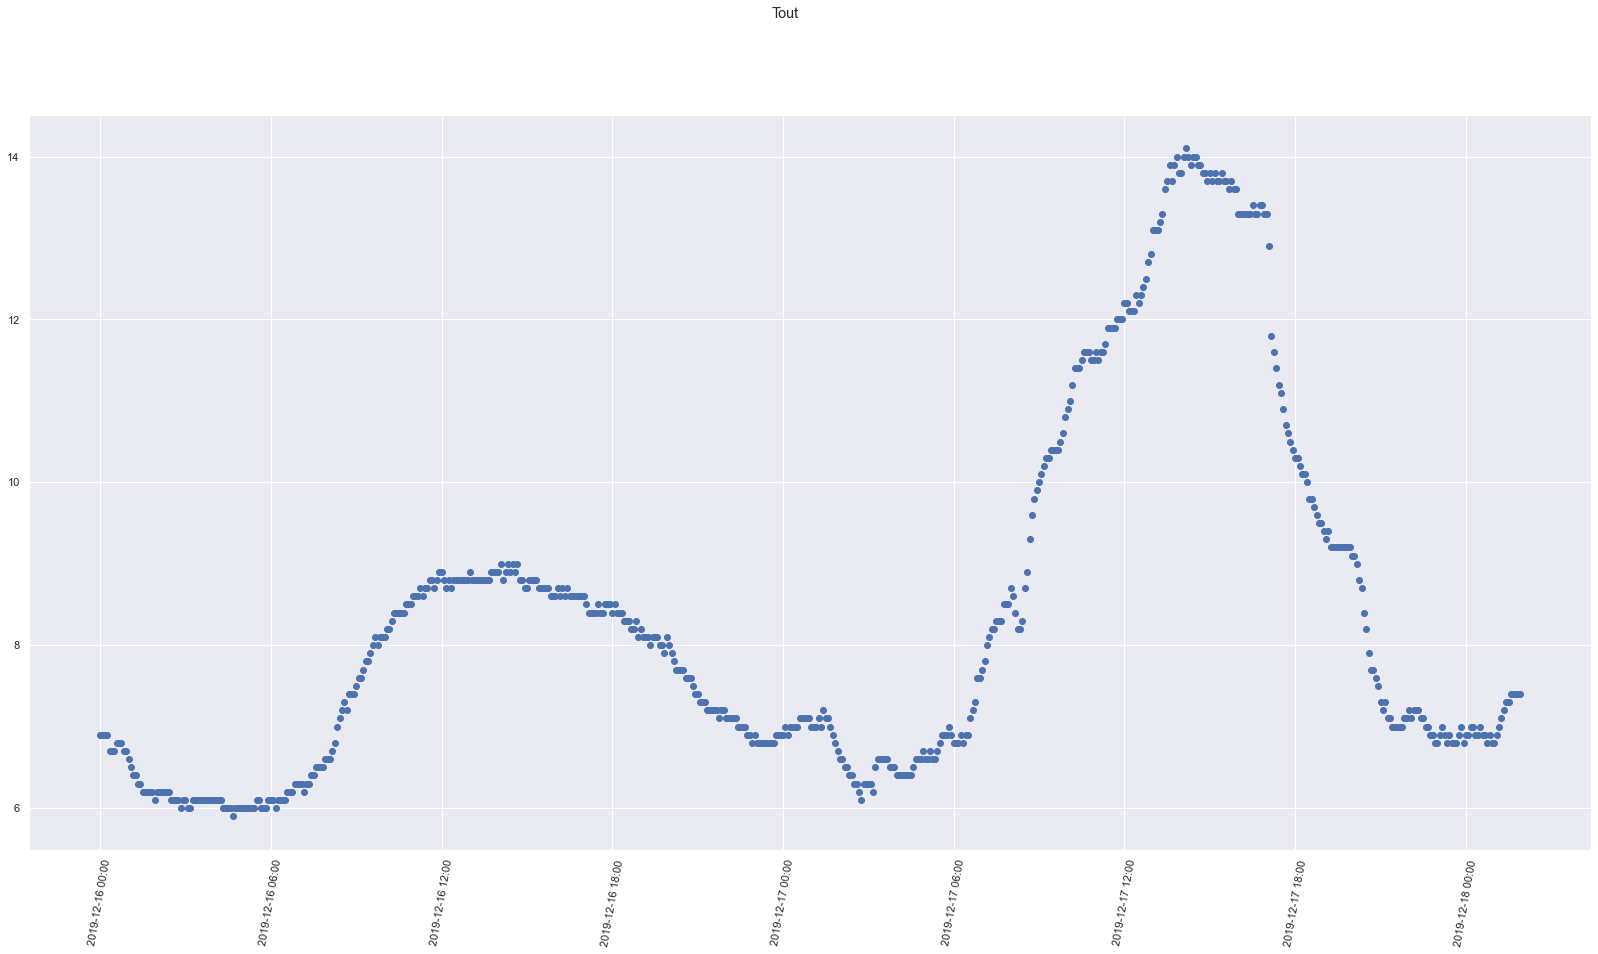

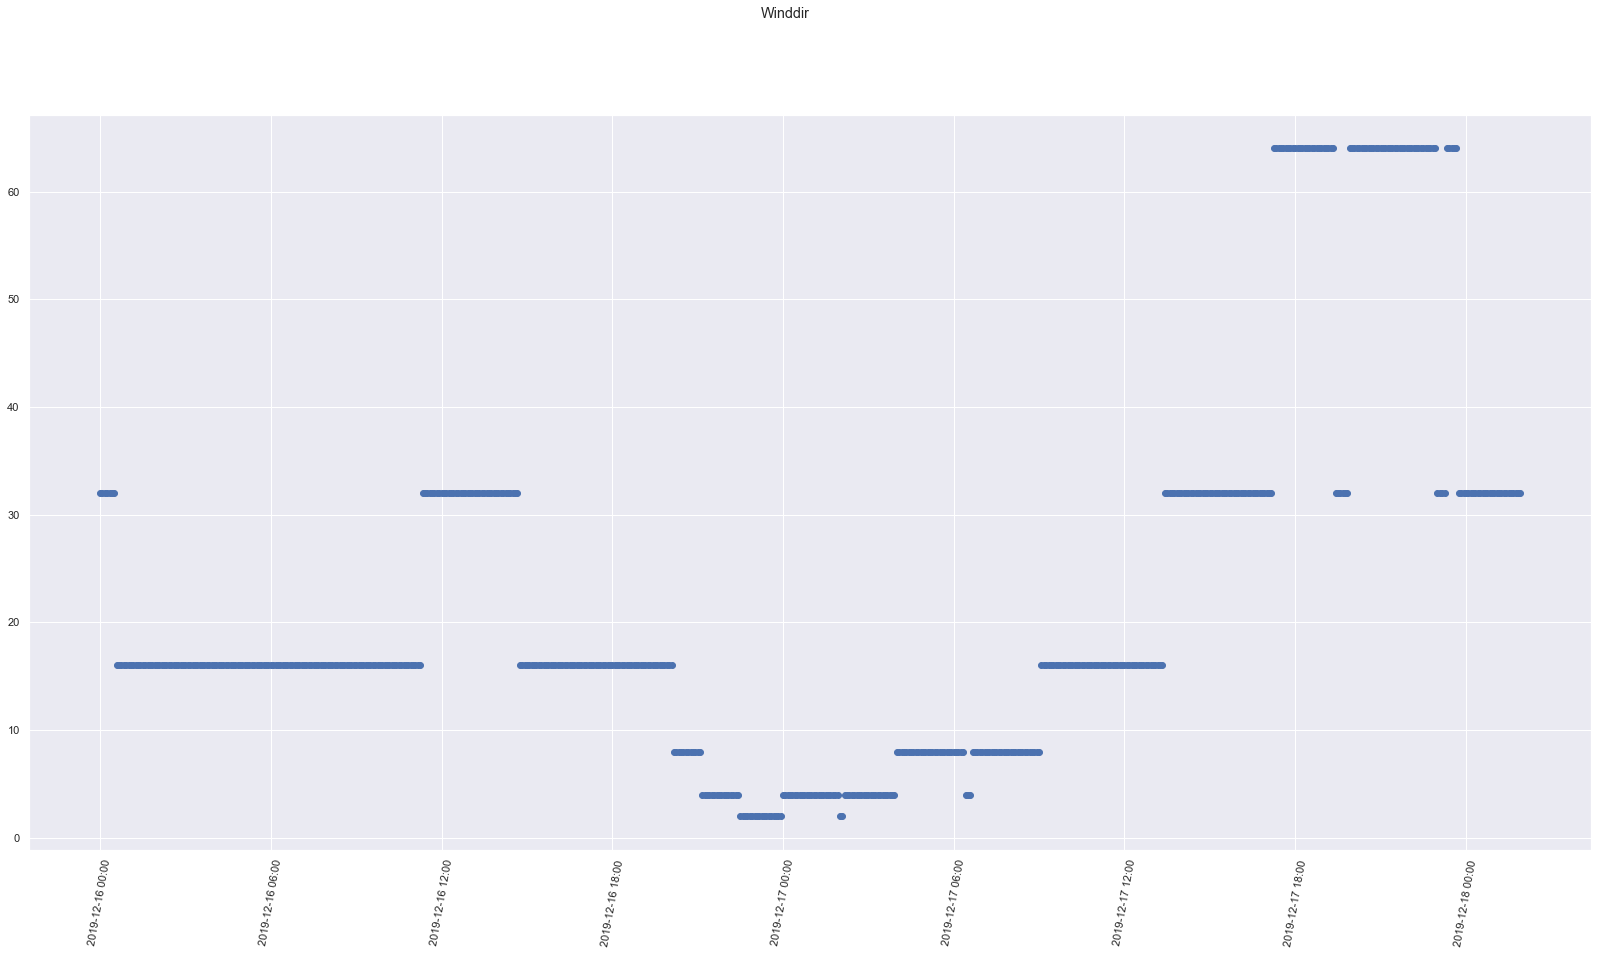

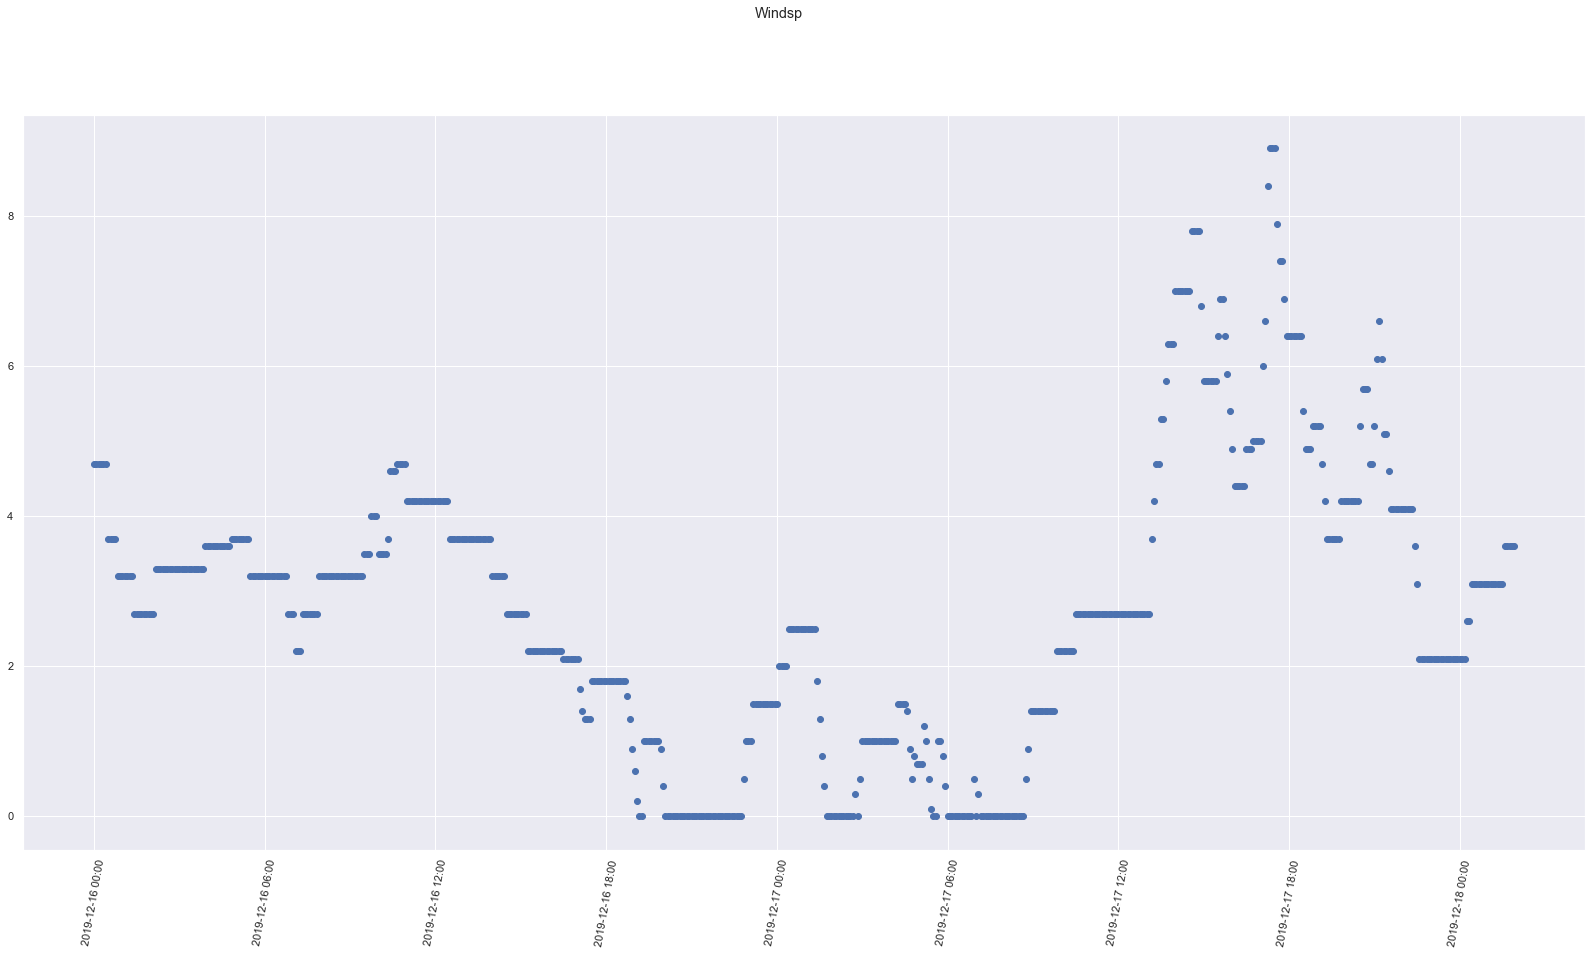

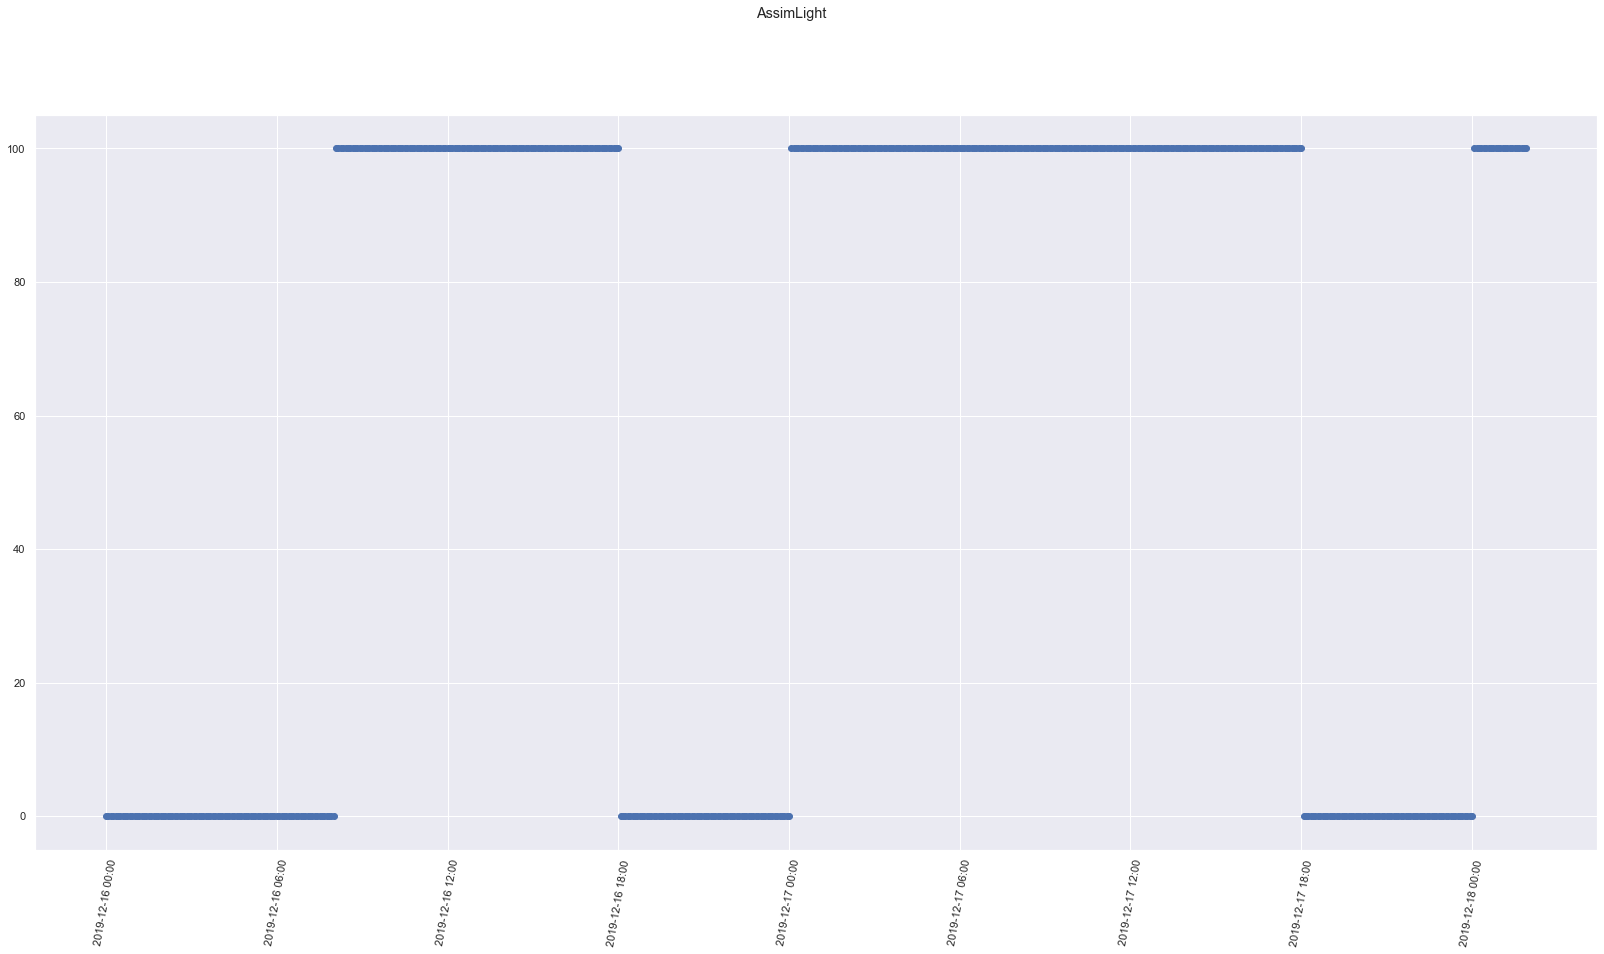

In [11]:
dates = matplotlib.dates.date2num(new_times)
sns.set(rc={'figure.figsize':(28,15)})
for col in df.columns[1:]:
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation= 80)
    # plot end times vs start times
    ax.scatter(new_times[:600],df[col][:600])
    # reformat ticks as HH:MM
    hh_mm = DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(hh_mm)

    fig.suptitle(col)
    plt.pause(1)

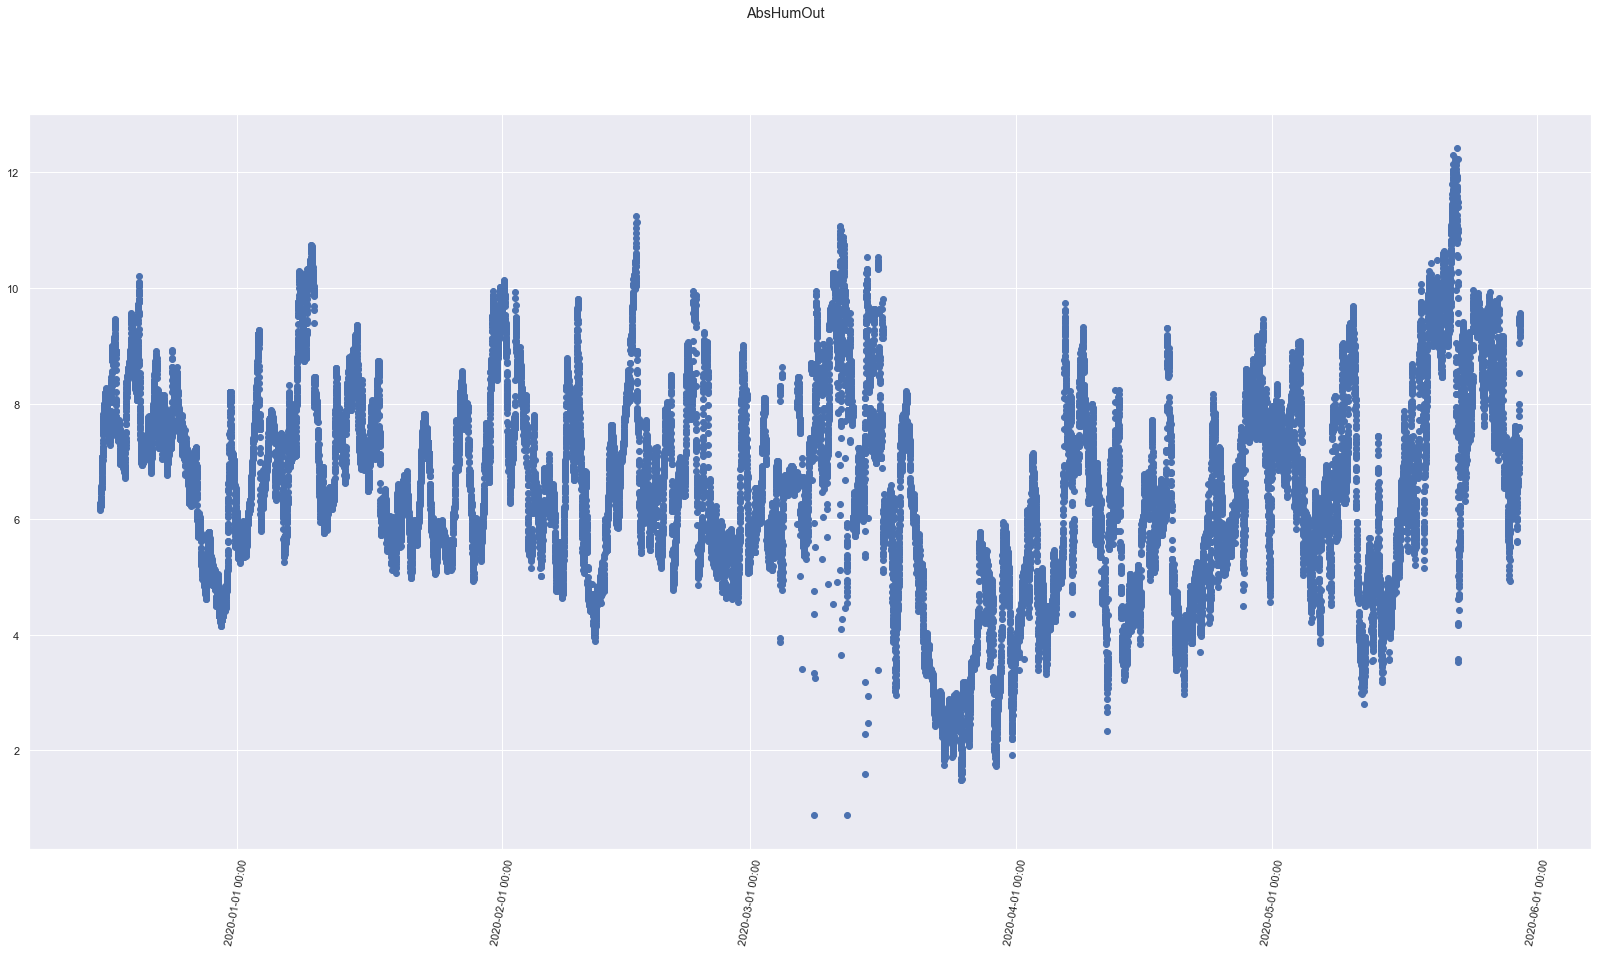

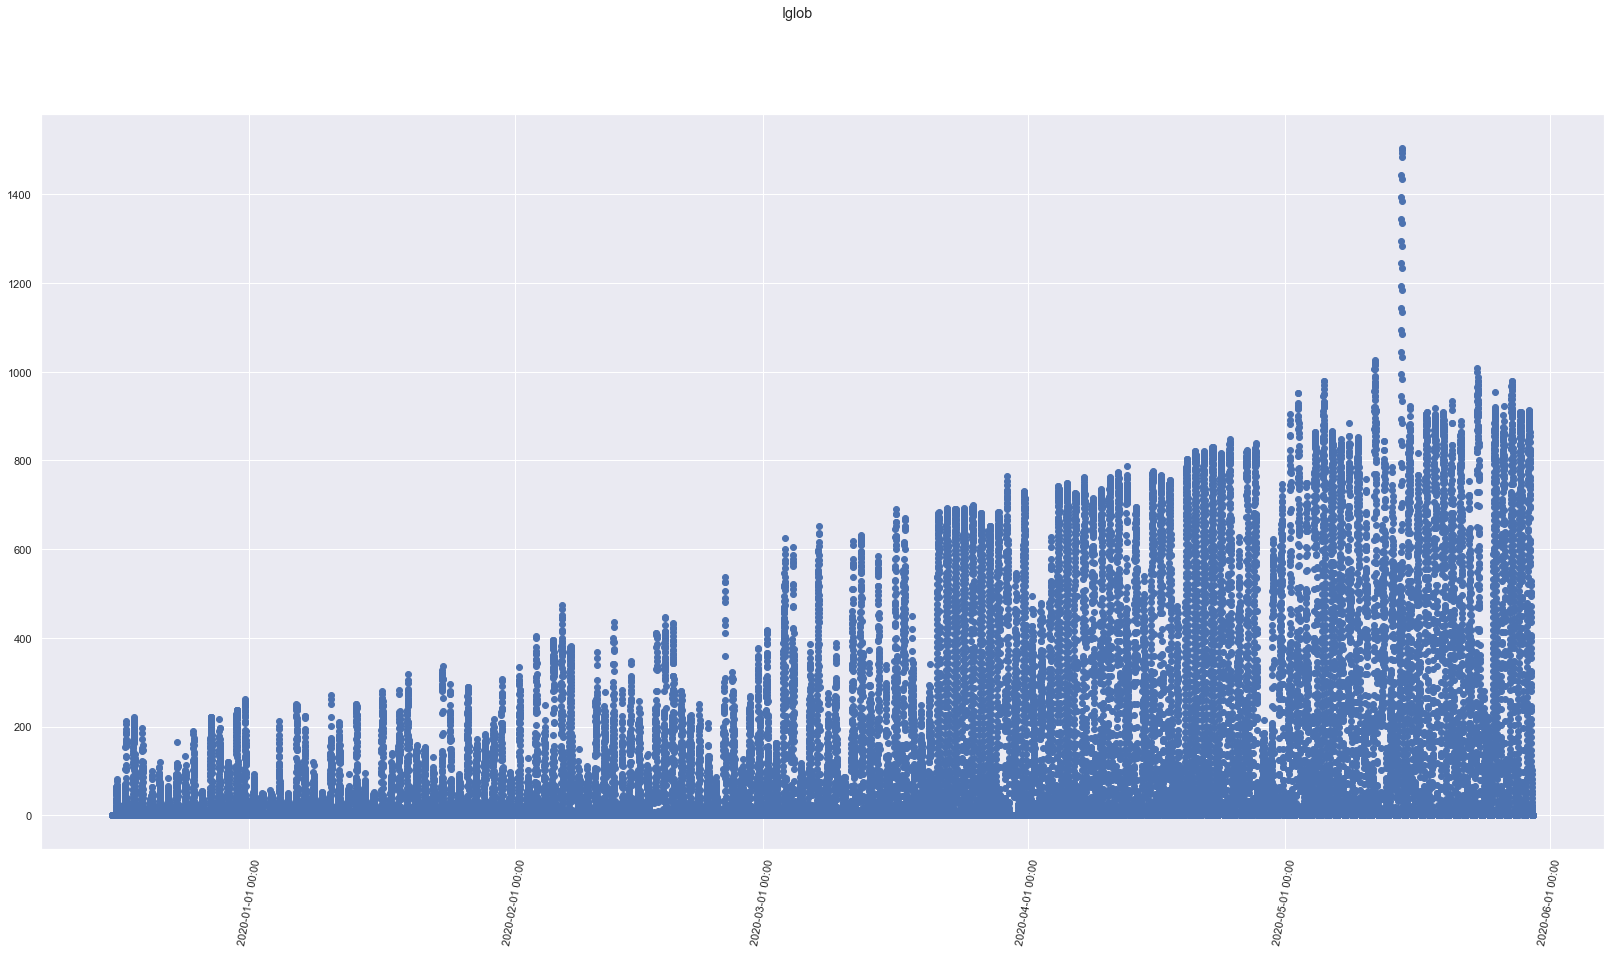

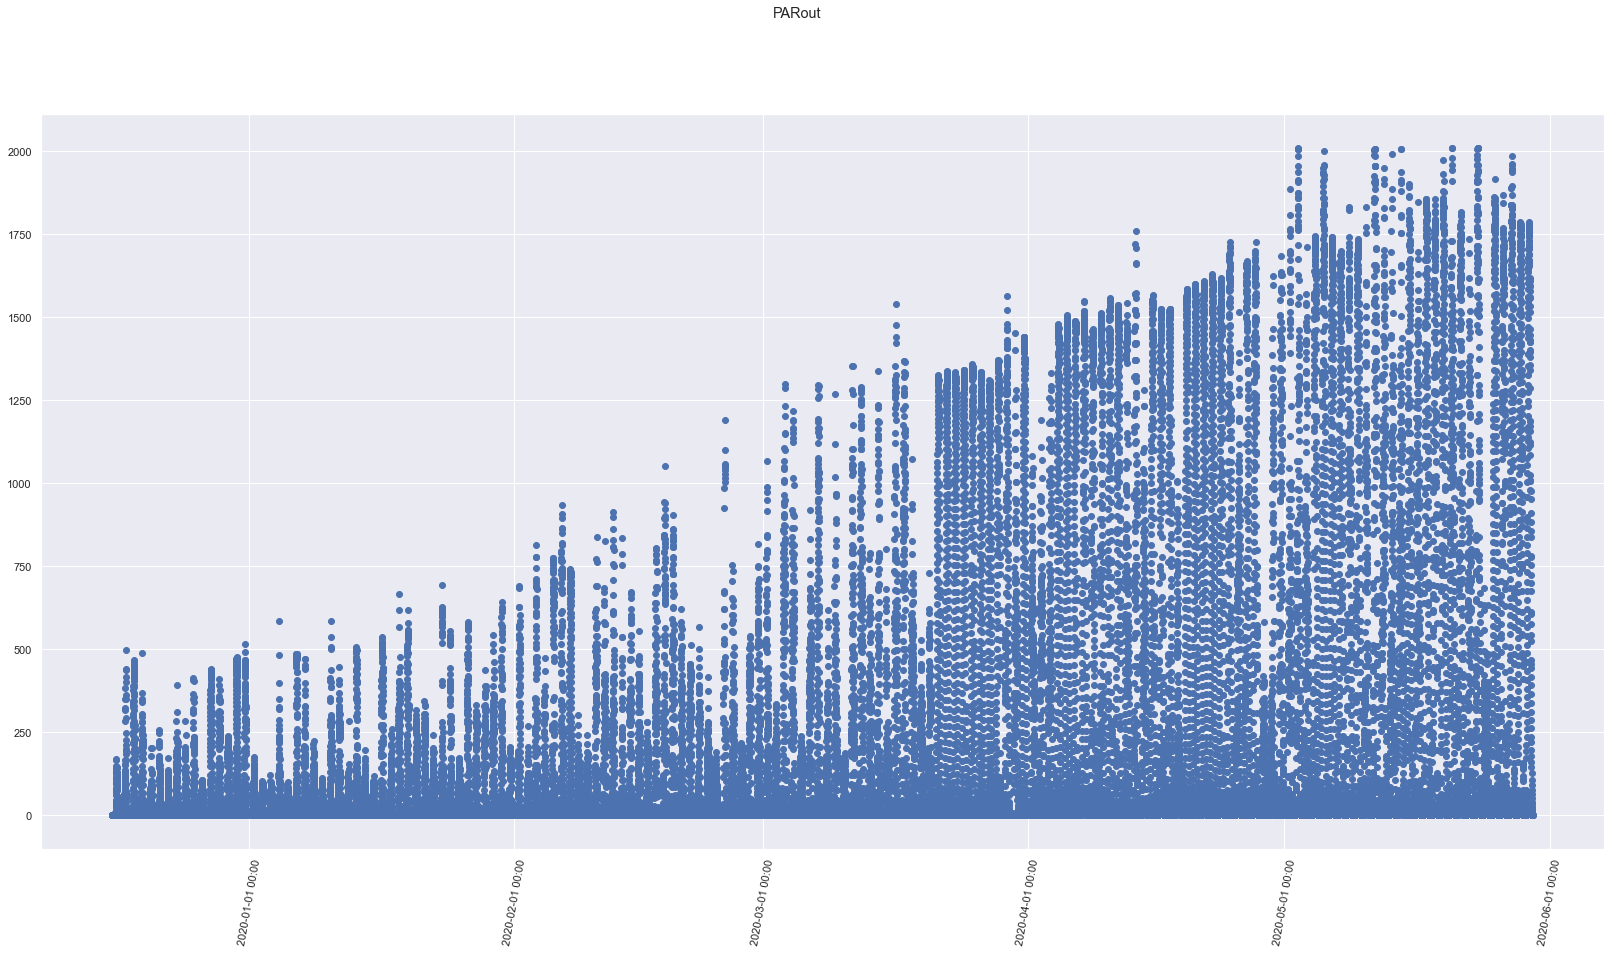

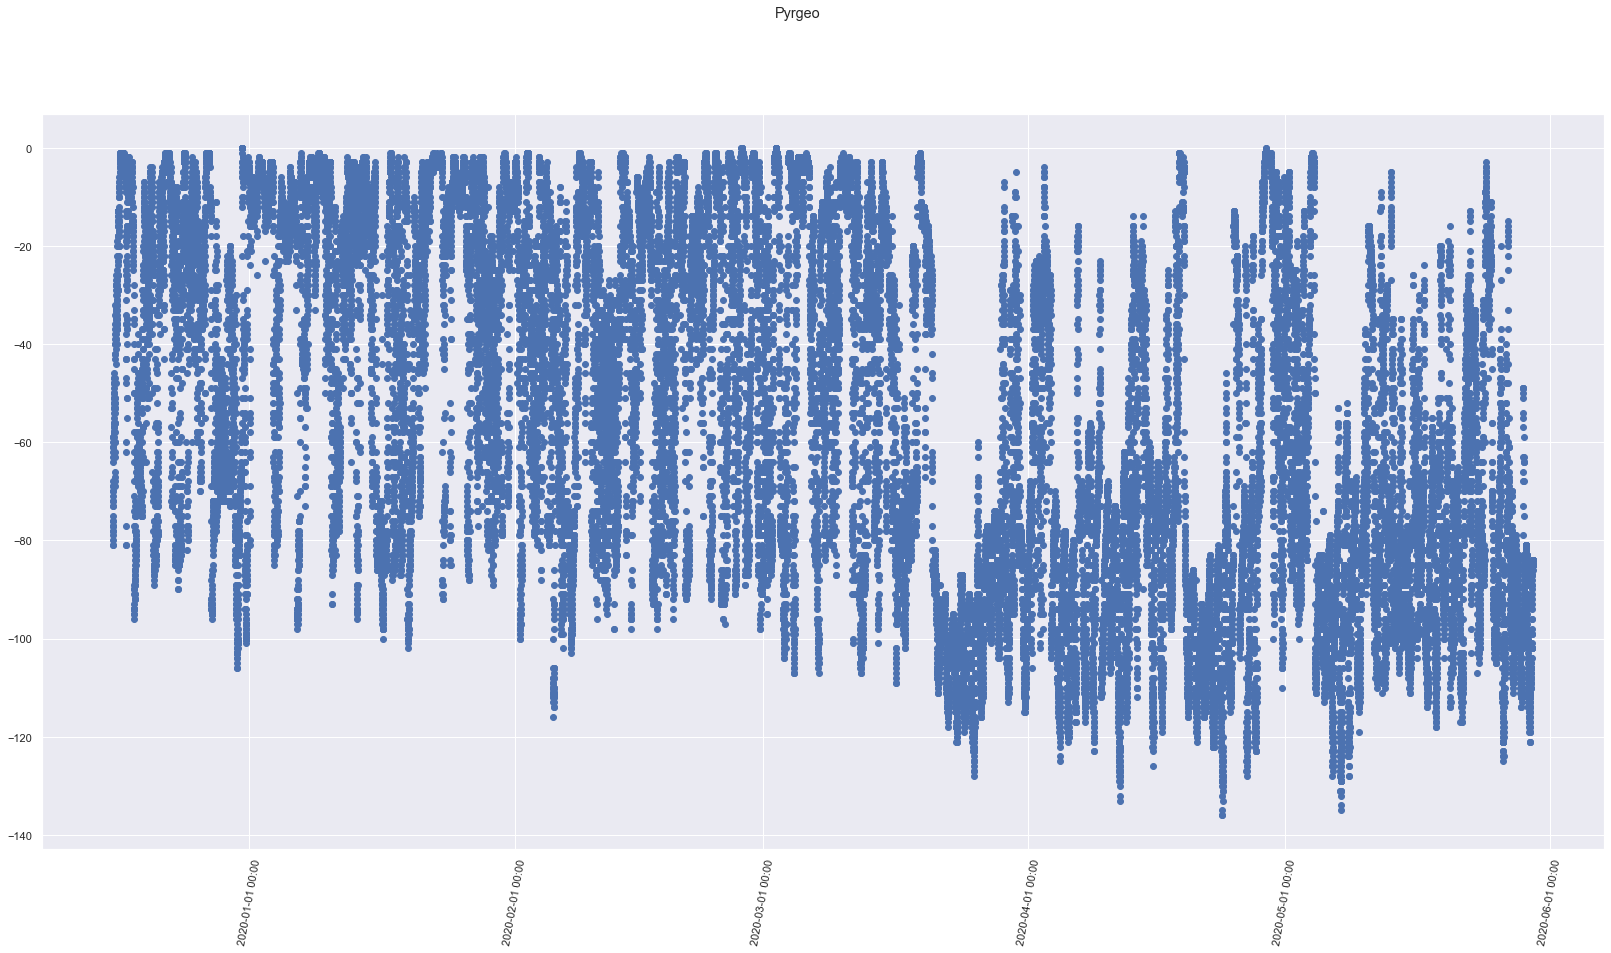

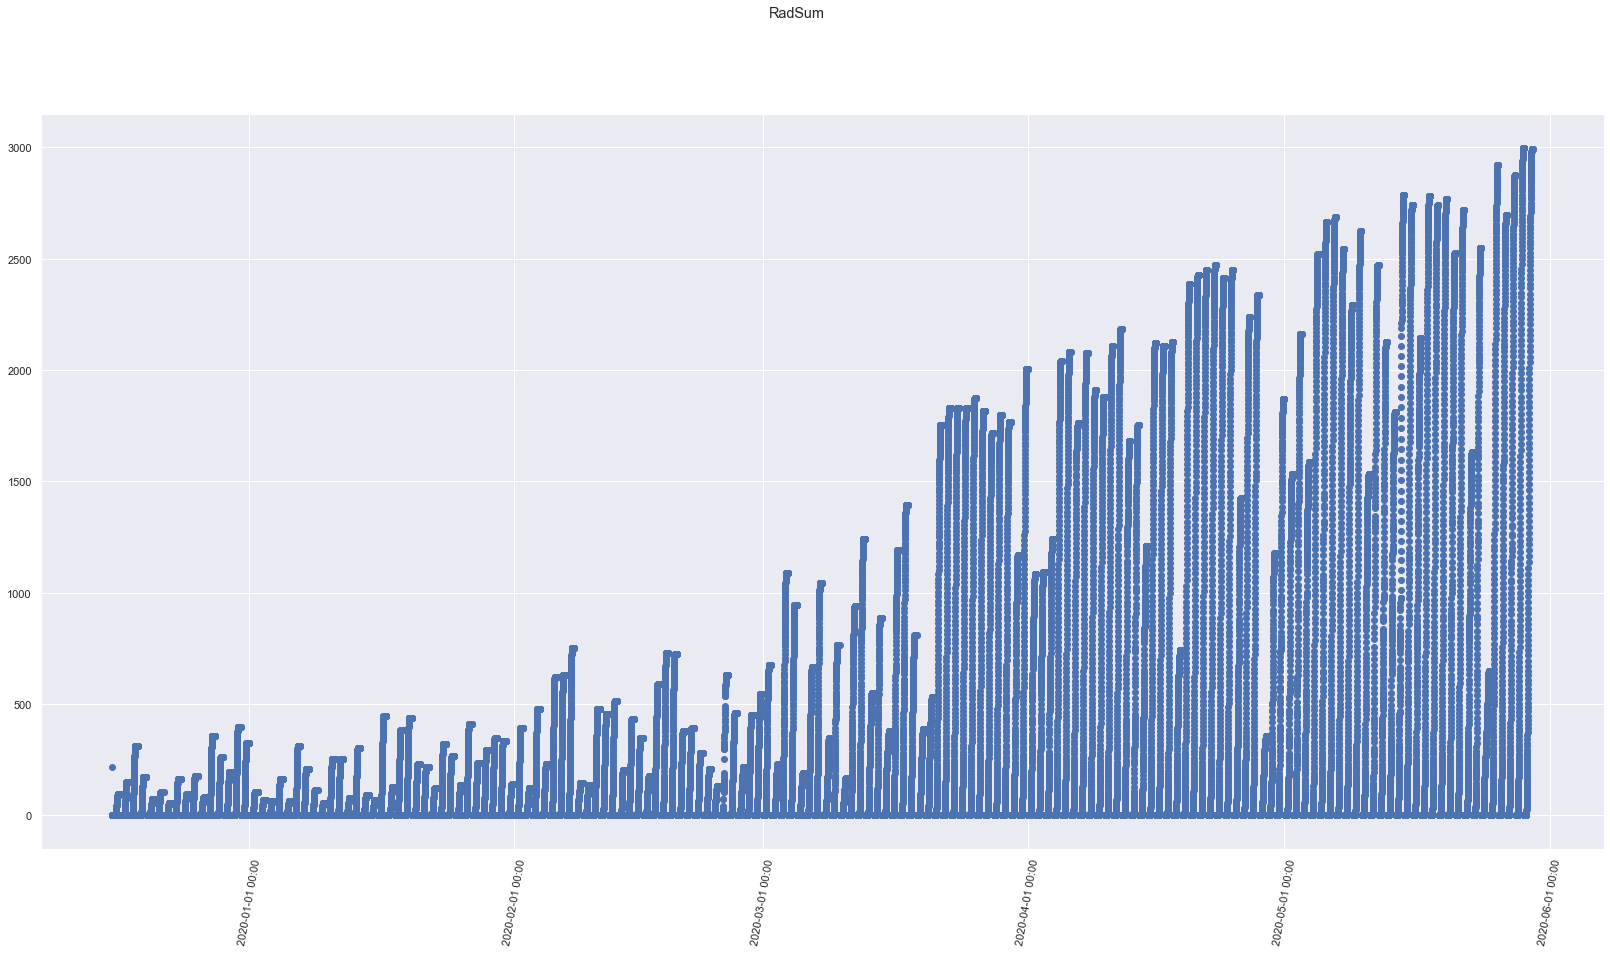

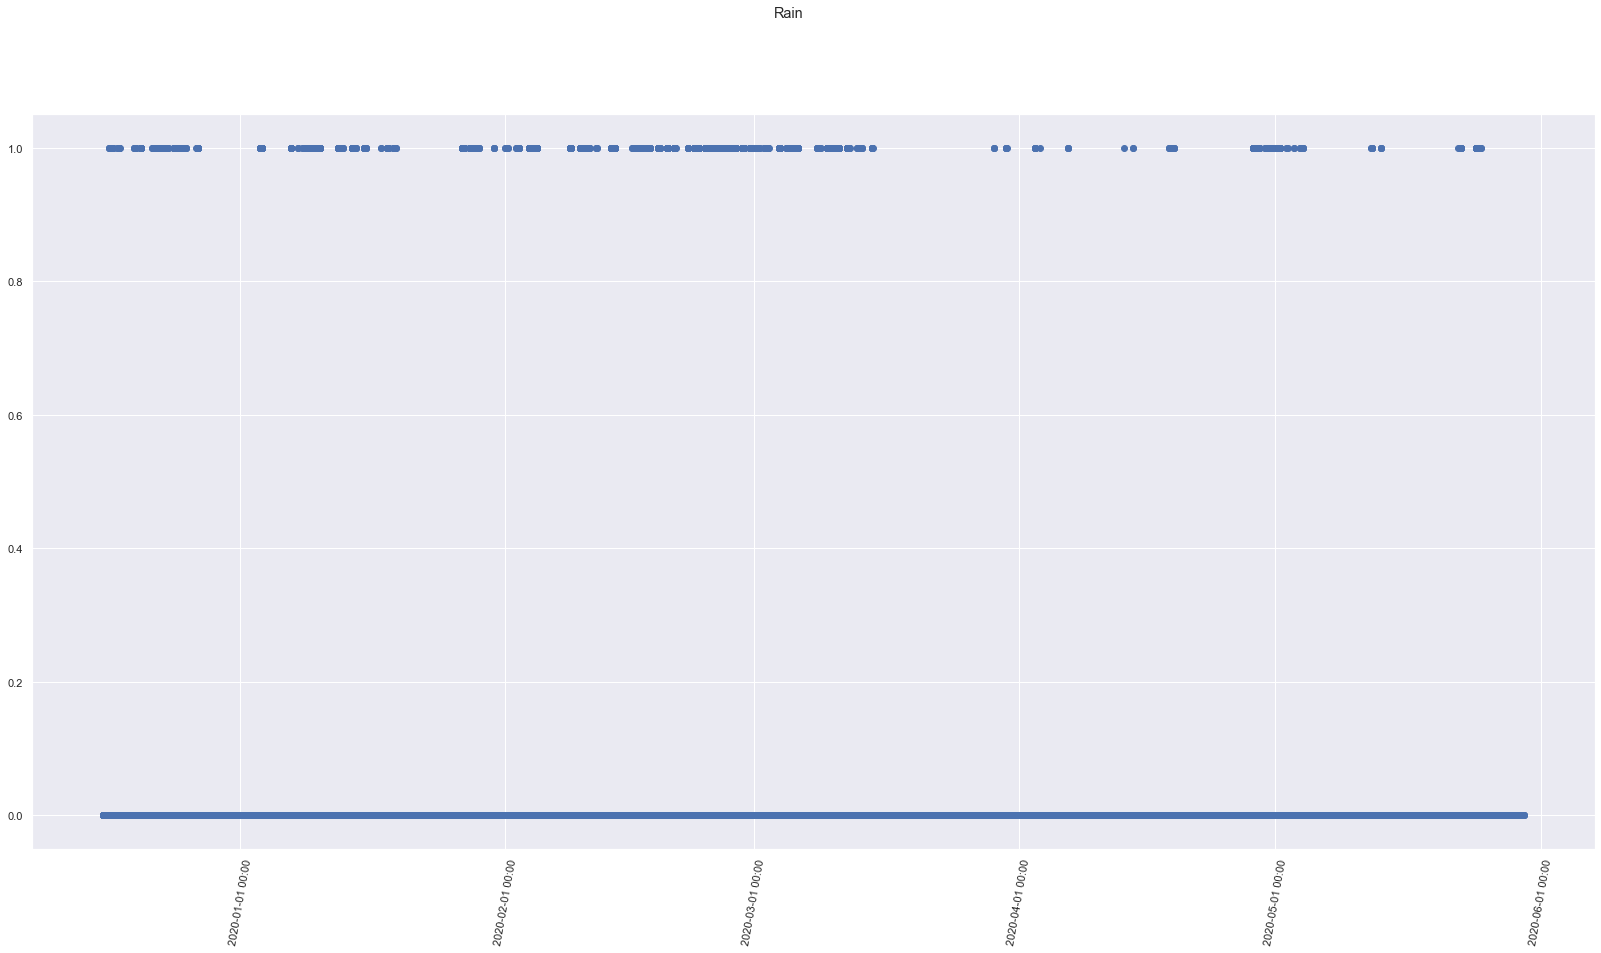

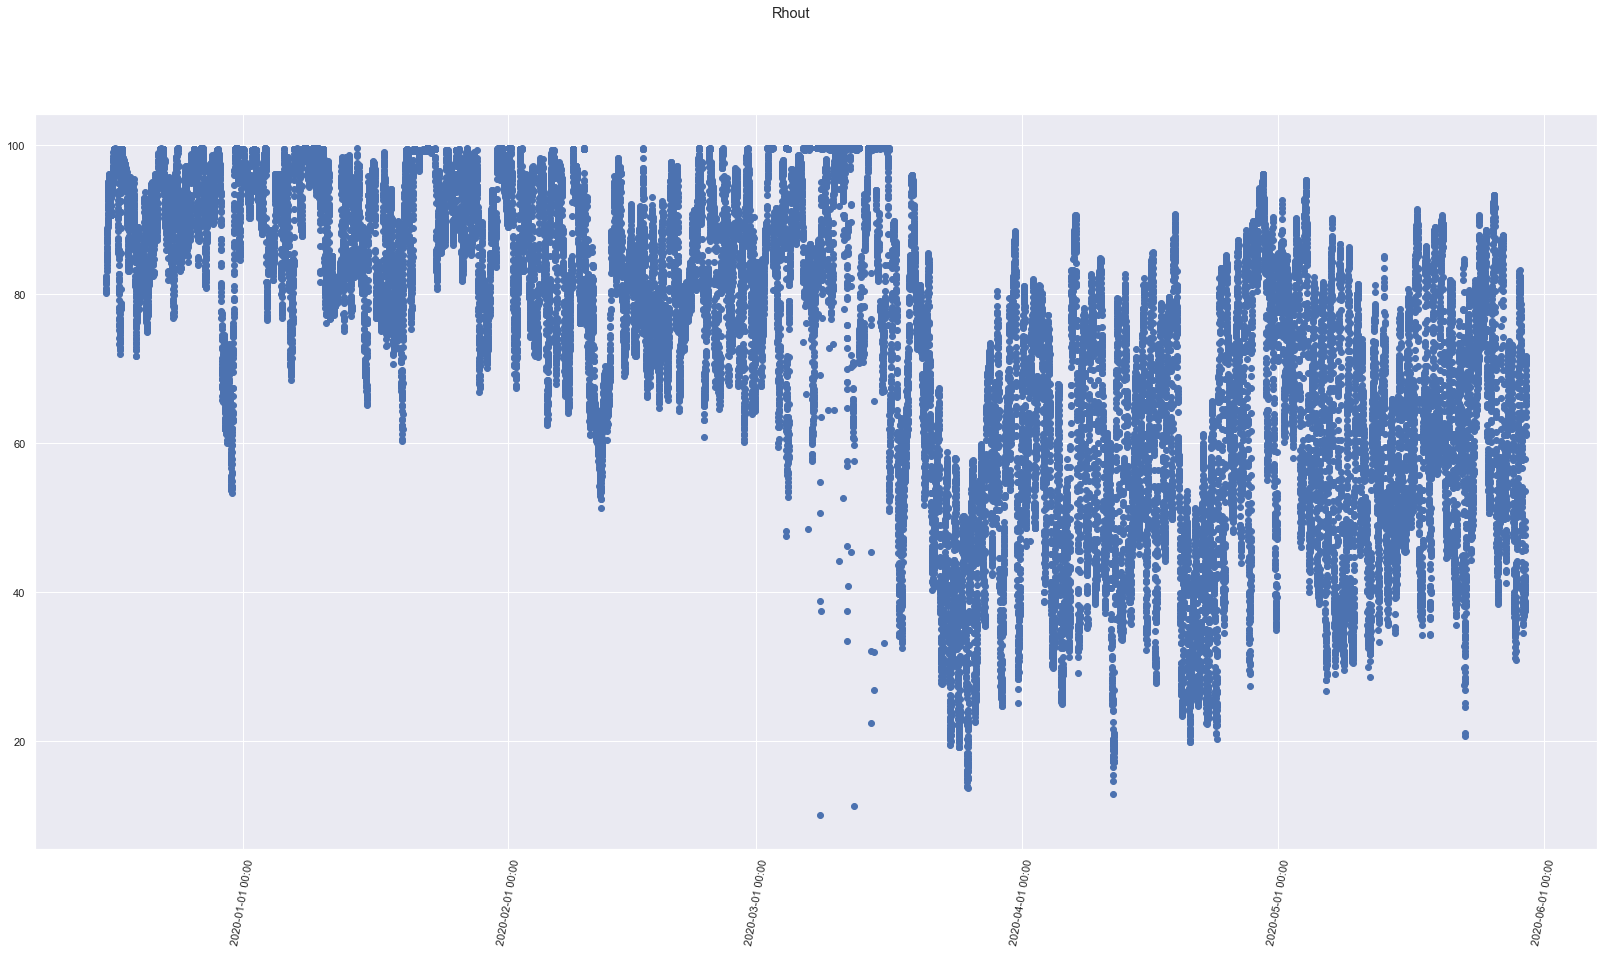

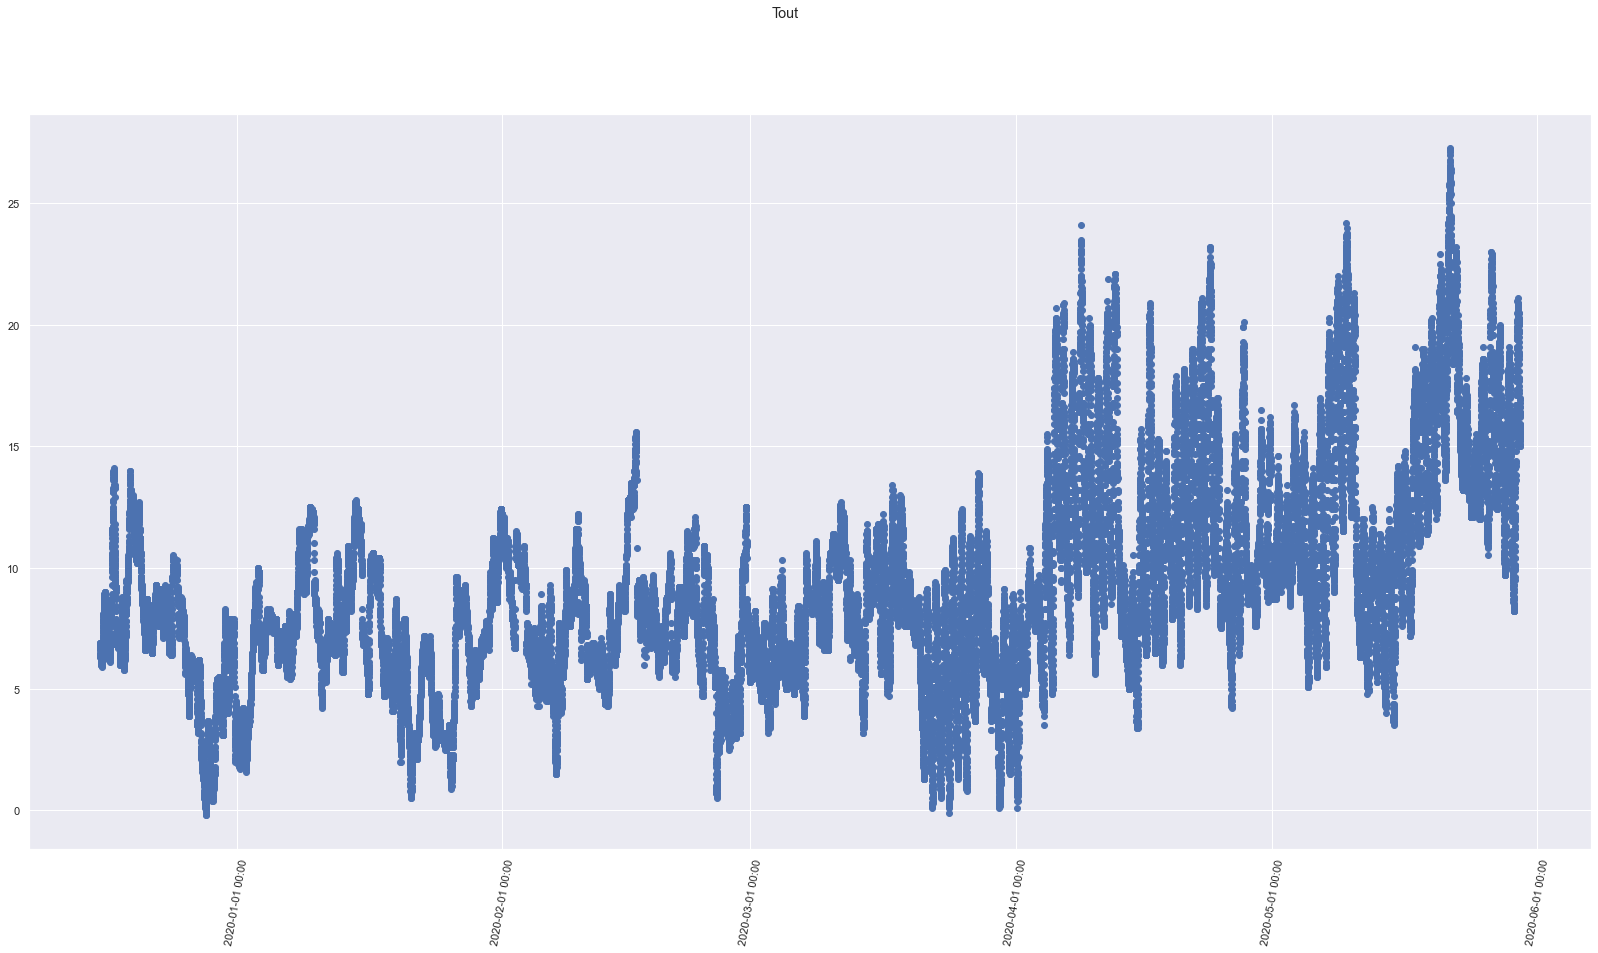

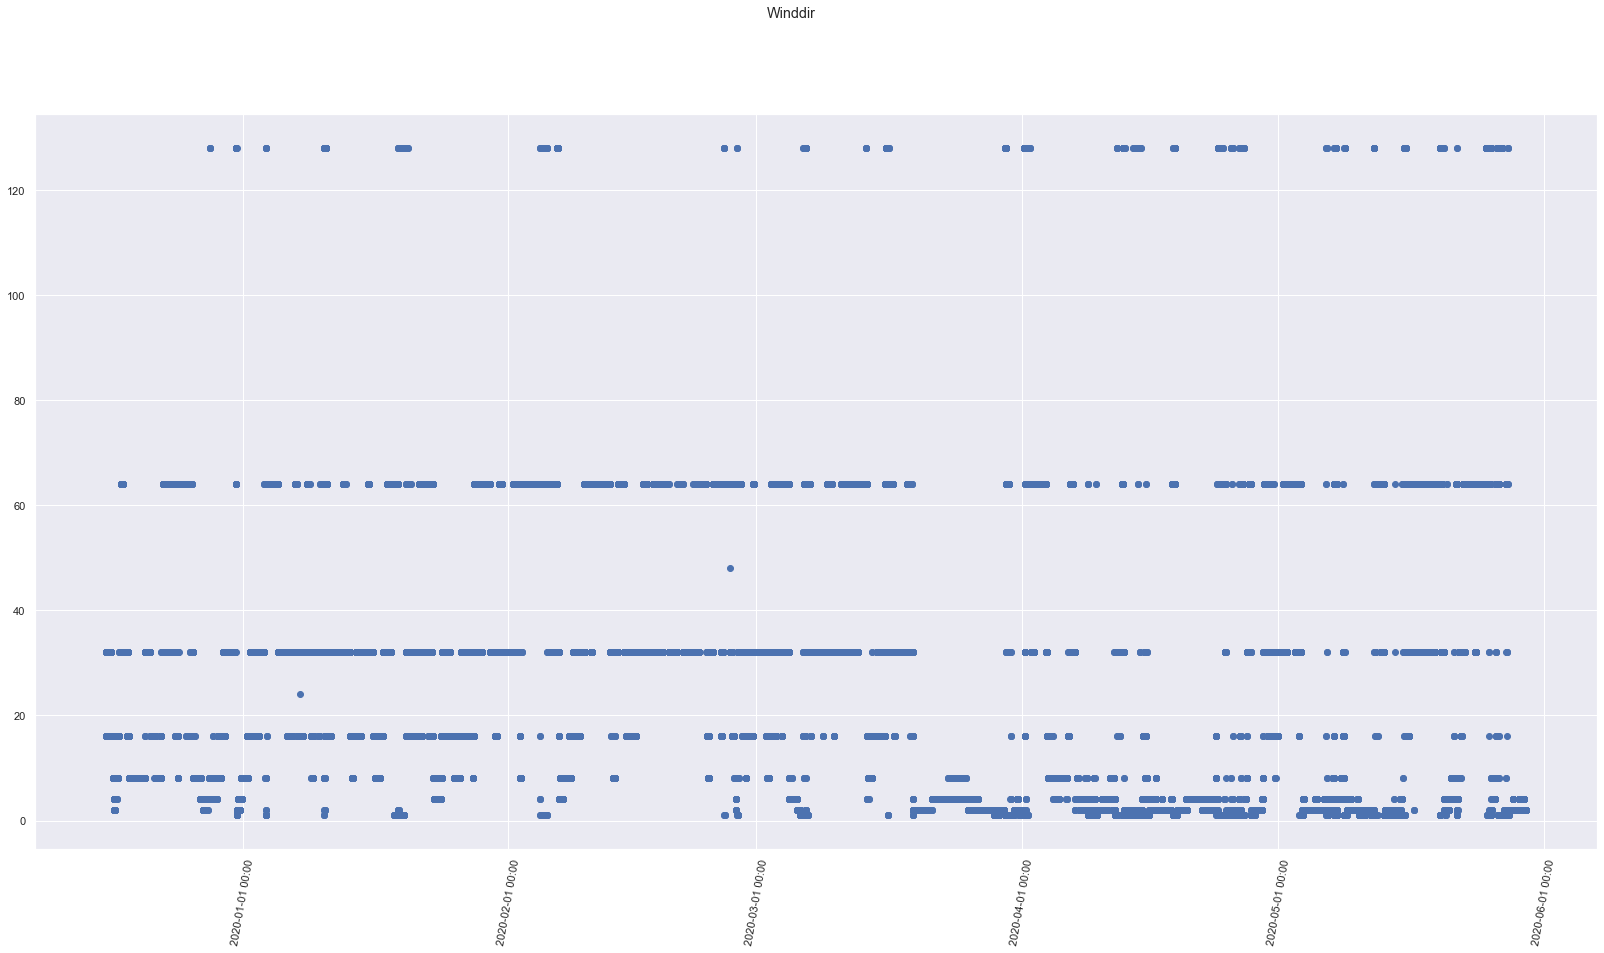

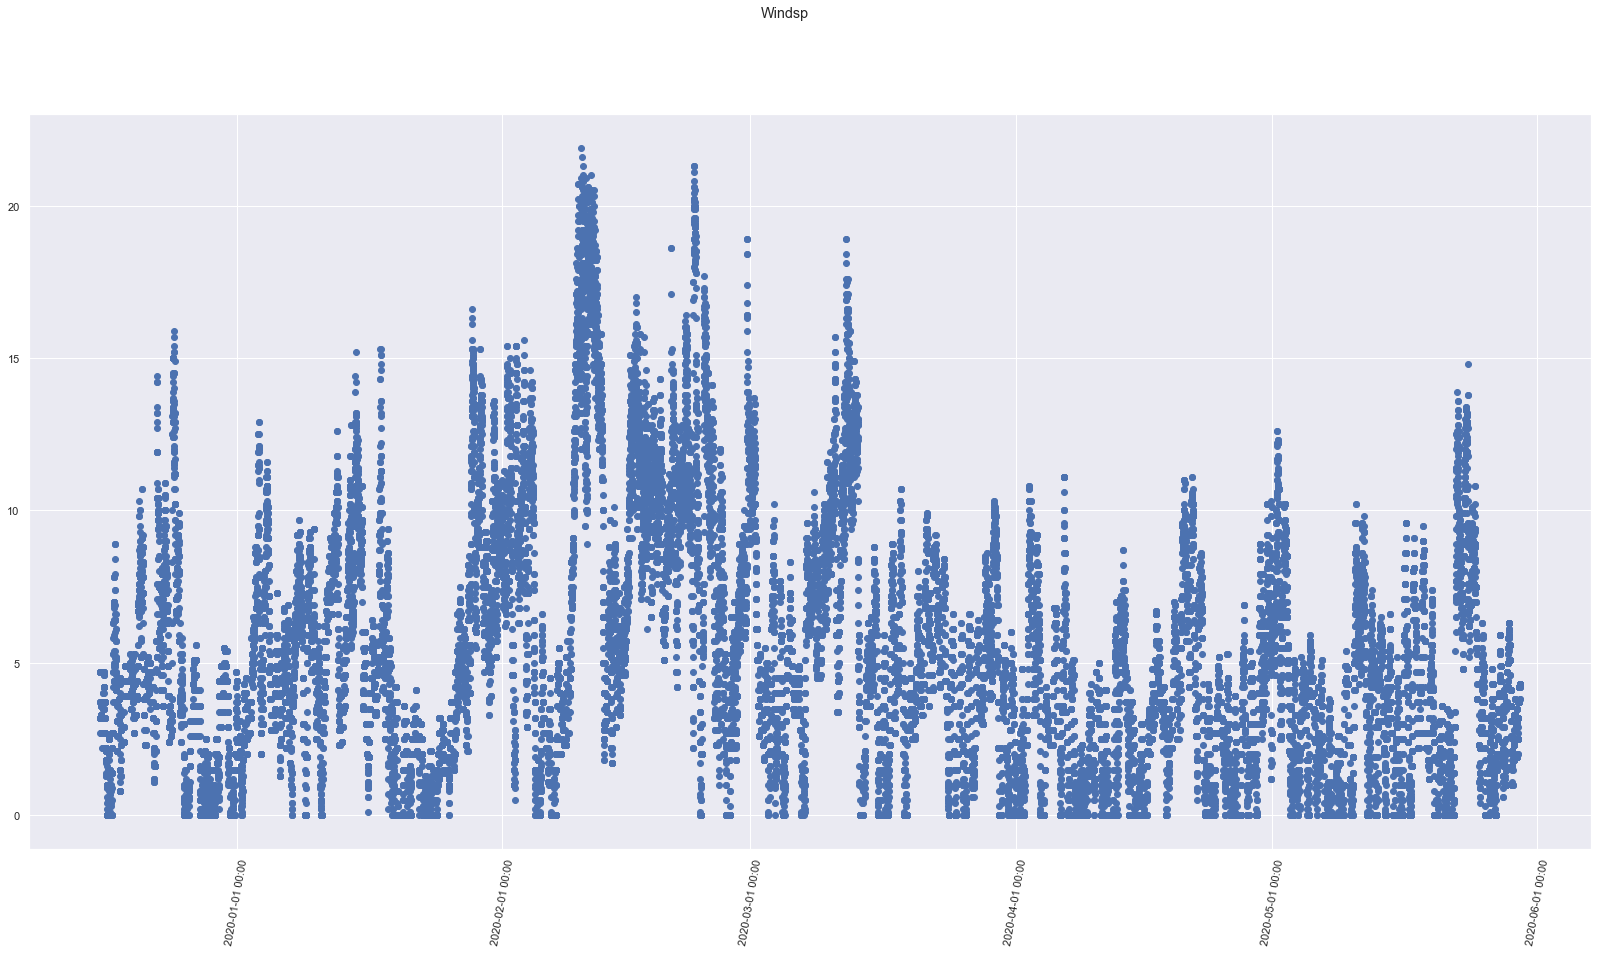

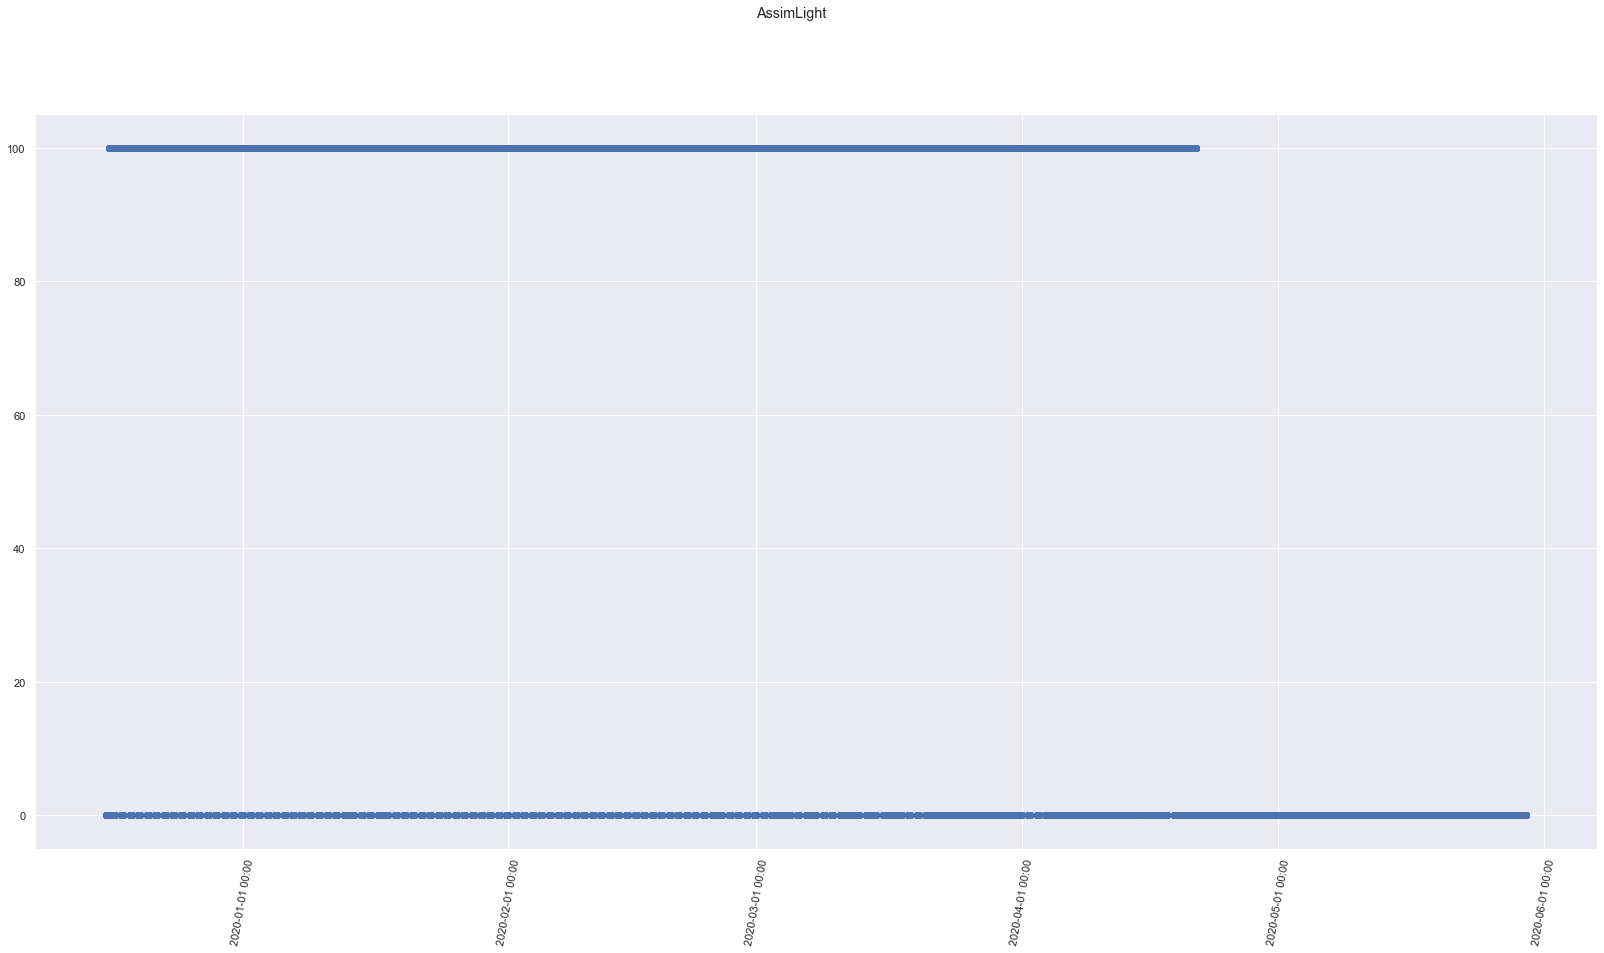

In [13]:
dates = matplotlib.dates.date2num(new_times)
sns.set(rc={'figure.figsize':(28,15)})
for col in df.columns[1:]:
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation= 80)
    # plot end times vs start times
    ax.scatter(new_times,df[col])
    # reformat ticks as HH:MM
    hh_mm = DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(hh_mm)

    fig.suptitle(col)
    plt.pause(1)